<a href="https://colab.research.google.com/github/academyExcelleance/AIMLOPS/blob/master/end_to_end_learning_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [1]:
from pathlib import Path
import urllib.request
import pandas as pd
import numpy as np
import tarfile
import seaborn as sns
from matplotlib import pyplot as plt


# Get the data

In [2]:
#def load_housing_data_from_zip():
#   if not Path("datasets/housing.tgz").is_file():
#     Path("datasets").mkdir(parents=True, exist_ok=True)
#     download_url = "https://github.com/academyExcelleance/dataset-aimlops/raw/master/housing.tgz"
#     urllib.request.urlretrieve(download_url, Path("datasets/housing.tgz"))
#     with tarfile.open(Path("datasets/housing.tgz")) as housingData:
#          housingData.extractall(path="datasets")

def load_housing_csv_data():
   if not Path("datasets/housing/housing.csv").is_file():
        Path("datasets/housing").mkdir(parents=True, exist_ok=True)
        download_url = "https://github.com/academyExcelleance/dataset-aimlops/raw/master/housing.csv"
        urllib.request.urlretrieve(download_url, Path("datasets/housing/housing.csv"))

#load_housing_data_from_zip()
load_housing_csv_data()

In [3]:
housing = pd.read_csv("datasets/housing/housing.csv");
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Exploratory Data Analysis (EDA)

Check the followings of dataset of each column
  *   Tensor rank(shape)
  *   What are features and what are columns
  *   Data Type
  *   value count
  *   Separate numerical and categorical column
  *   Missing Value
  *   Check outlier (Histogram/Barplot)
  *   Pair plot against target column - check impact of individual feature on target
  *   coorelation between columns/features
  *   Check and separate if there is any temporal data
  *   Check rare value category



In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*   25% (Q1): -121.800000 → 25% of the longitude are ≤ -121.800000.
*   50% (Median/Q2): -118.490000 → 50% of the longitude are ≤ -118.490000.
*   75% (Q3): -118.010000 → 75% of the longitude are ≤ -118.010000.



**Option #1 - simple count**

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above details indicate that total_bedrooms column has null value for (20640 - 20433) 207 rows. All columns are numerical except target (ocean_proximity)

In [4]:
numerical_column = housing.select_dtypes(include=[np.number]).columns
categorical_column = housing.select_dtypes(exclude=[np.number]).columns

print(numerical_column)
print(categorical_column)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


Above is example how to separate categorcal and numerical columns. Here we do not require

**Option #2 - simple count**

In [ ]:
for col in housing.columns:
  print(f"\033[1mFeathur: {col}\033[0m")
  print(f'Data TYpe: {housing[col].dtype}')
  print(f'Value count: {housing[col].count()}')
  print(f'Missing Value count: {housing[col].isnull().sum()}')
  print(f'Unique Value count: {housing[col].nunique()}')
  print()

Feathur: longitude
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 844

Feathur: latitude
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 862

Feathur: housing_median_age
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 52

Feathur: total_rooms
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 5926

Feathur: total_bedrooms
Data TYpe: float64
Value count: 20433
Missing Value count: 207
Unique Value count: 1923

Feathur: population
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 3888

Feathur: households
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 1815

Feathur: median_income
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 12928

Feathur: median_house_value
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 3842

Feathur: ocean_pr

As per above data, ocean_proximity  has 5 unique values, need to check unique values

total_bedrooms has 207 null values

Other than ocean_proximity all are numerical

In [ ]:
housing.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


As per above result, <1H OCEAN has high value (9136) whereas ISLAND has only 5 values. This is very low and not balanced. Need to add more data set for ISLAND

In [ ]:
numerical_column = [col for col in housing.columns if pd.api.types.is_numeric_dtype(housing[col])]
categorical_columns = [col for col in housing.columns if not pd.api.types.is_numeric_dtype(housing[col])]
print(categorical_columns)
print(numerical_column)

['ocean_proximity']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


**Optiuon #3 - Summerize the data with statistical analysis**

In [ ]:
summary = pd.DataFrame(housing.dtypes, columns=['dtype'])
summary = summary.reset_index()
summary = summary.rename(columns={'index':'Name'})
summary['Value_Count'] = summary.Name.apply(lambda x: housing[x].count())
#summary['Null_Value'] = summary.Name.apply(lambda x: housing[x].isnull().sum())
summary['Null_Value'] = housing.isnull().sum().values
summary['Null_Value_Percentage'] = 100*summary.Null_Value/summary.Value_Count
#summary['Unique_Value'] = summary.Name.apply(lambda x: housing[x].nunique())
summary['Unique_Value'] = housing.nunique().values
summary['Unique_Value_Percentage'] = 100*summary.Unique_Value/summary.Value_Count
summary.sort_values(by='Null_Value_Percentage', ascending=False, inplace=True)

summary


,Name,dtype,Value_Count,Null_Value,Null_Value_Percentage,Unique_Value,Unique_Value_Percentage
4,total_bedrooms,float64,20433,207,1.013067,1923,9.411247
0,longitude,float64,20640,0,0.000000,844,4.089147
1,latitude,float64,20640,0,0.000000,862,4.176357
2,housing_median_age,float64,20640,0,0.000000,52,0.251938
3,total_rooms,float64,20640,0,0.000000,5926,28.711240
5,population,float64,20640,0,0.000000,3888,18.837209
6,households,float64,20640,0,0.000000,1815,8.793605
7,median_income,float64,20640,0,0.000000,12928,62.635659
8,median_house_value,float64,20640,0,0.000000,3842,18.614341
9,ocean_proximity,object,20640,0,0.000000,5,0.024225


**What is outliers?**

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* median (Q2/50th Percentile): the middle value of the dataset.
* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
* InterQuartile Range (IQR): 25th to the 75th percentile. IQR tells how spread the middle values are. (Q3 - Q1)

* “maximum”: Q3 + 1.5*IQR
* “minimum”: Q1 -1.5*IQR
* Outliers: Outlier is < minimum or  > maximum







**Box plot - Outlier Analysis**

In [6]:
outliers_summary = pd.DataFrame(["outlier_count", "outlier_percentage","icr", "lower_bound", "upper_bound"])
for col in numerical_column:
    # finding the 1st quartile
    q1 = np.quantile(housing[col], 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(housing[col], 0.75)
    med = np.median(housing[col])

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = housing[(housing[col] <= lower_bound) | (housing[col] >= upper_bound)]
    outliers_count = len(outliers)
    outliers_summary[col] = [outliers_count,outliers_count/len(housing)*100,iqr,lower_bound,upper_bound]

outliers_summary


,0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,outlier_count,0.000,0.00,0.0,1287.000000,0.0,1198.000000,1220.000000,681.000000,1071.000000
1,outlier_percentage,0.000,0.00,0.0,6.235465,0.0,5.804264,5.910853,3.299419,5.188953
2,icr,3.790,3.78,19.0,1700.250000,NaN,938.000000,325.000000,2.179850,145125.000000
3,lower_bound,-127.485,28.26,-10.5,-1102.625000,NaN,-620.000000,-207.500000,-0.706375,-98087.500000
4,upper_bound,-112.325,43.38,65.5,5698.375000,NaN,3132.000000,1092.500000,8.013025,482412.500000


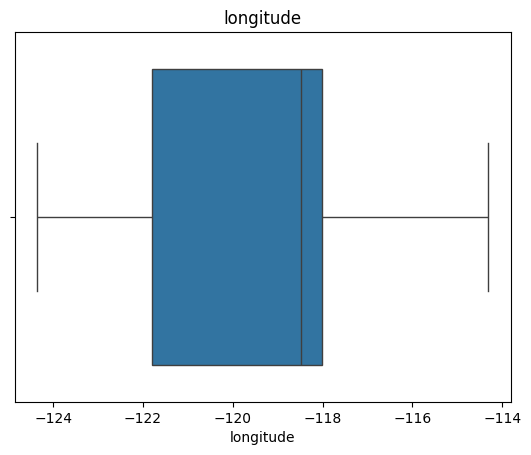

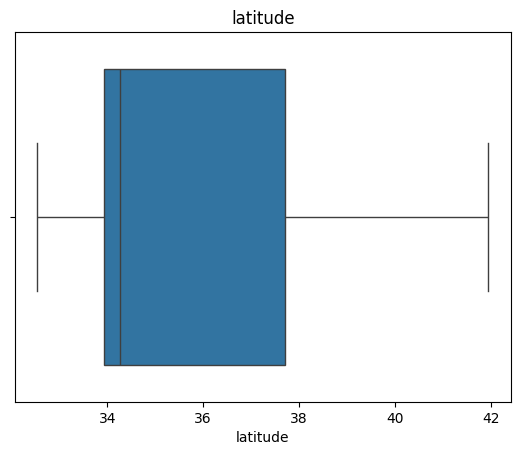

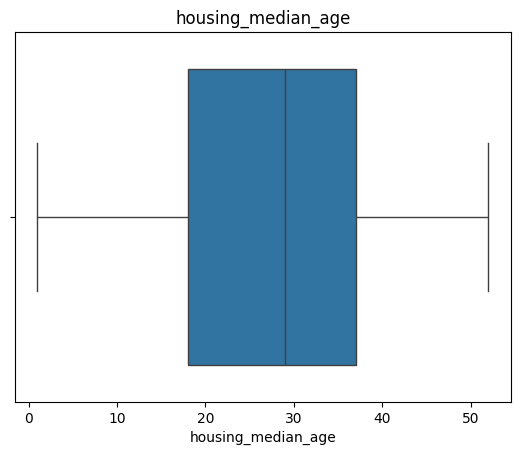

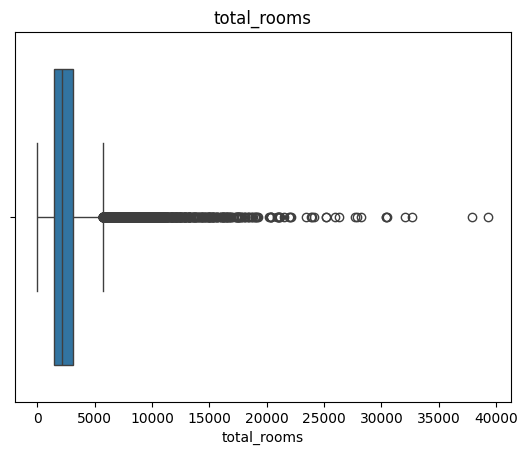

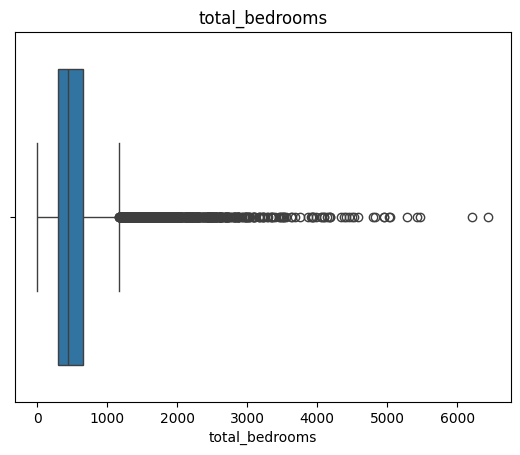

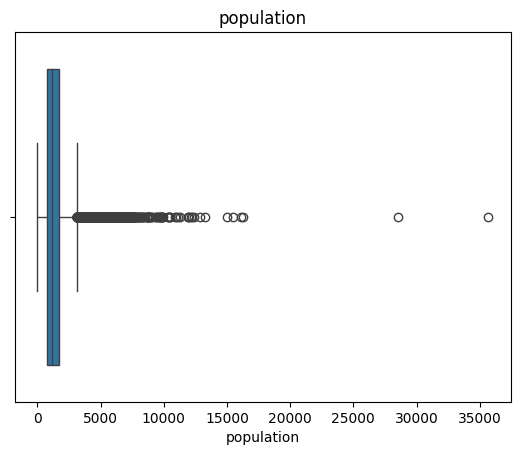

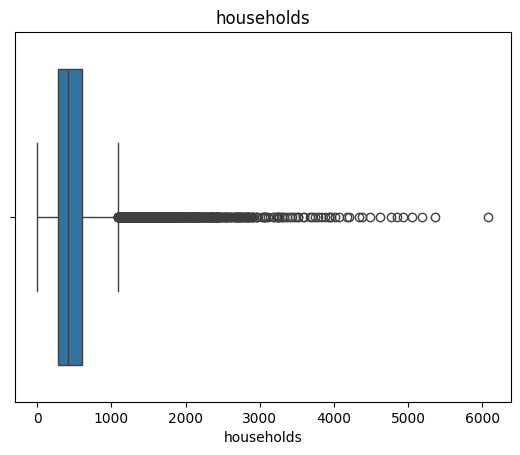

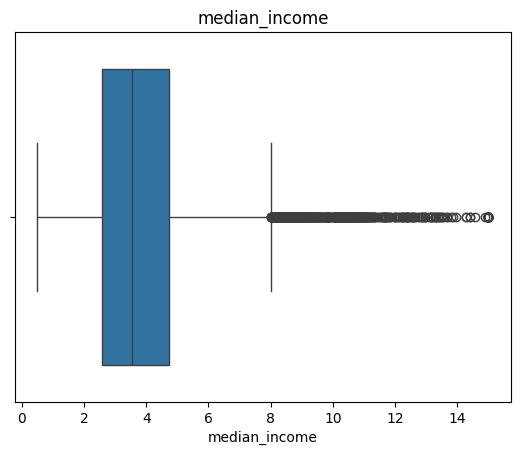

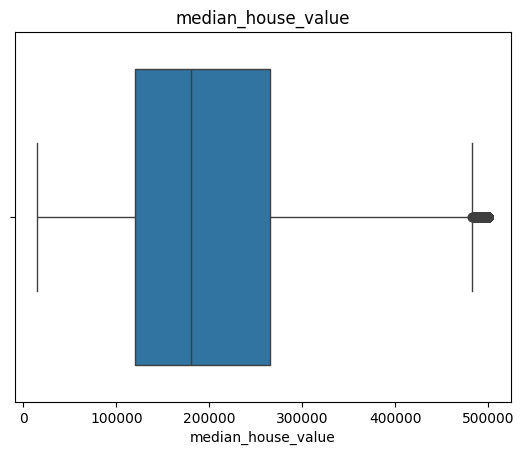

In [11]:
for col in numerical_column:
  sns.boxplot(x=housing[col])
  plt.title(col)
  plt.show()

# Exploratory  Data Analysis - Visualize (EDA)

**Histogram** is applicable only for **numerical attributes**

A **histogram** is a type of bar plot that helps in visualizing the distribution of a dataset. It is widely used in data analysis to understand how values in a dataset are spread across ranges (or bins). This can ***reveal patterns, outliers, and the shape (like skewness or modality)*** of the data.

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or we can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute


**How a Histogram Helps in Data Analysis:**

***Understand Distribution:***

Reveals whether the data follows a normal distribution, is skewed, or has multiple peaks.

***Identify Outliers:***

Any bars that are separated from the rest indicate outliers.
Determine Central Tendency & Spread:

Shows where most data points lie (e.g., clustered around the mean).


***Detect Skewness:***

If the bars are unevenly spread, it suggests positive or negative skew in the data.

***Evaluate Data Binning:***

Helps group continuous data into ranges, making it easier to interpret.

Option #1 - Display Histogram using based on each column

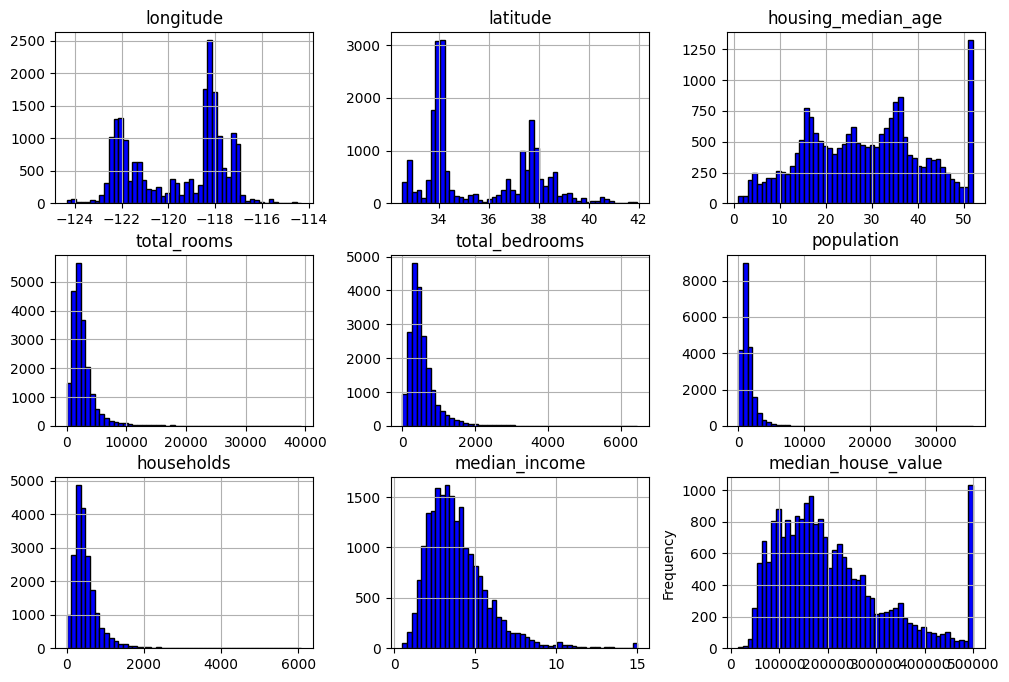

In [ ]:
# option 1 - hist on full dataframe , this handles numercal data set only
housing.hist(bins=50,color='blue', figsize=(12, 8),edgecolor='black', histtype='bar')
plt.ylabel("Frequency")
plt.show()
#for col in numerical_column:
    # option# 2 - use plt.hist - for each column
    #plt.hist(housing[col],bins=50,range=(housing[col].min(), housing[col].max()), color='blue', edgecolor='black',
    #alpha=0.7, rwidth=0.9, label=col, histtype='bar')

    #option# 3 - use hist on dataframe for each column
 #  housing[col].hist(bins=50,range=(housing[col].min(), housing[col].max()), color='blue', edgecolor='black',
 #  alpha=0.7, rwidth=0.9, label=col, histtype='bar')
 #  plt.title(col)
 #  plt.xlabel(col)
 #  plt.ylabel("Frequency")
 #  plt.legend()
 #  plt.show()
